In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('filtered_diabetes Gestational Diabetes - Dataset 3.csv')
df2 = pd.read_csv('Gestational Diabetes.csv')
df3 = pd.read_excel('Gestational Diabetic Data Set.xlsx')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           188 non-null    float64
 1   Pregnancy No  188 non-null    float64
 2   Weight        188 non-null    float64
 3   Height        188 non-null    float64
 4   BMI           188 non-null    float64
 5   Heredity      188 non-null    int64  
 6   Prediction    188 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 10.4 KB


In [4]:
df1.shape

(188, 7)

In [5]:
df1.describe().T

count        mean       std    min    25%    50%    75%    max
Age           188.0   25.436170  5.331891   16.0   21.0   25.5   28.0   42.0
Pregnancy No  188.0    1.473404  1.185625    0.0    1.0    1.0    2.0    6.0
Weight        188.0   60.095745  6.420337   45.0   55.0   60.0   65.0   81.0
Height        188.0  162.010638  8.549315  145.0  156.0  162.0  167.0  196.0
BMI           188.0   22.874468  1.467468   18.5   21.9   23.2   24.0   24.9
Heredity      188.0    0.117021  0.322304    0.0    0.0    0.0    0.0    1.0
Prediction    188.0    0.053191  0.225014    0.0    0.0    0.0    0.0    1.0

In [6]:
df1.duplicated().sum()
print("=================")
df1 = df1.drop_duplicates()
print("=================")
df1.duplicated().sum()

0

In [7]:
df1.isnull().sum()

Age             0
Pregnancy No    0
Weight          0
Height          0
BMI             0
Heredity        0
Prediction      0
dtype: int64

In [8]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return  low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

columns = ['Age', 'Pregnancy No', 'Weight', 'Height', 'BMI', 'Heredity', 'Prediction']
for col in columns:
    print(col, check_outlier(df1, columns))

Age True
Pregnancy No True
Weight True
Height True
BMI True
Heredity True
Prediction True


Outliers are not removed because Weight and BMI are important features for diabetes prediction in pregnancy

---



---



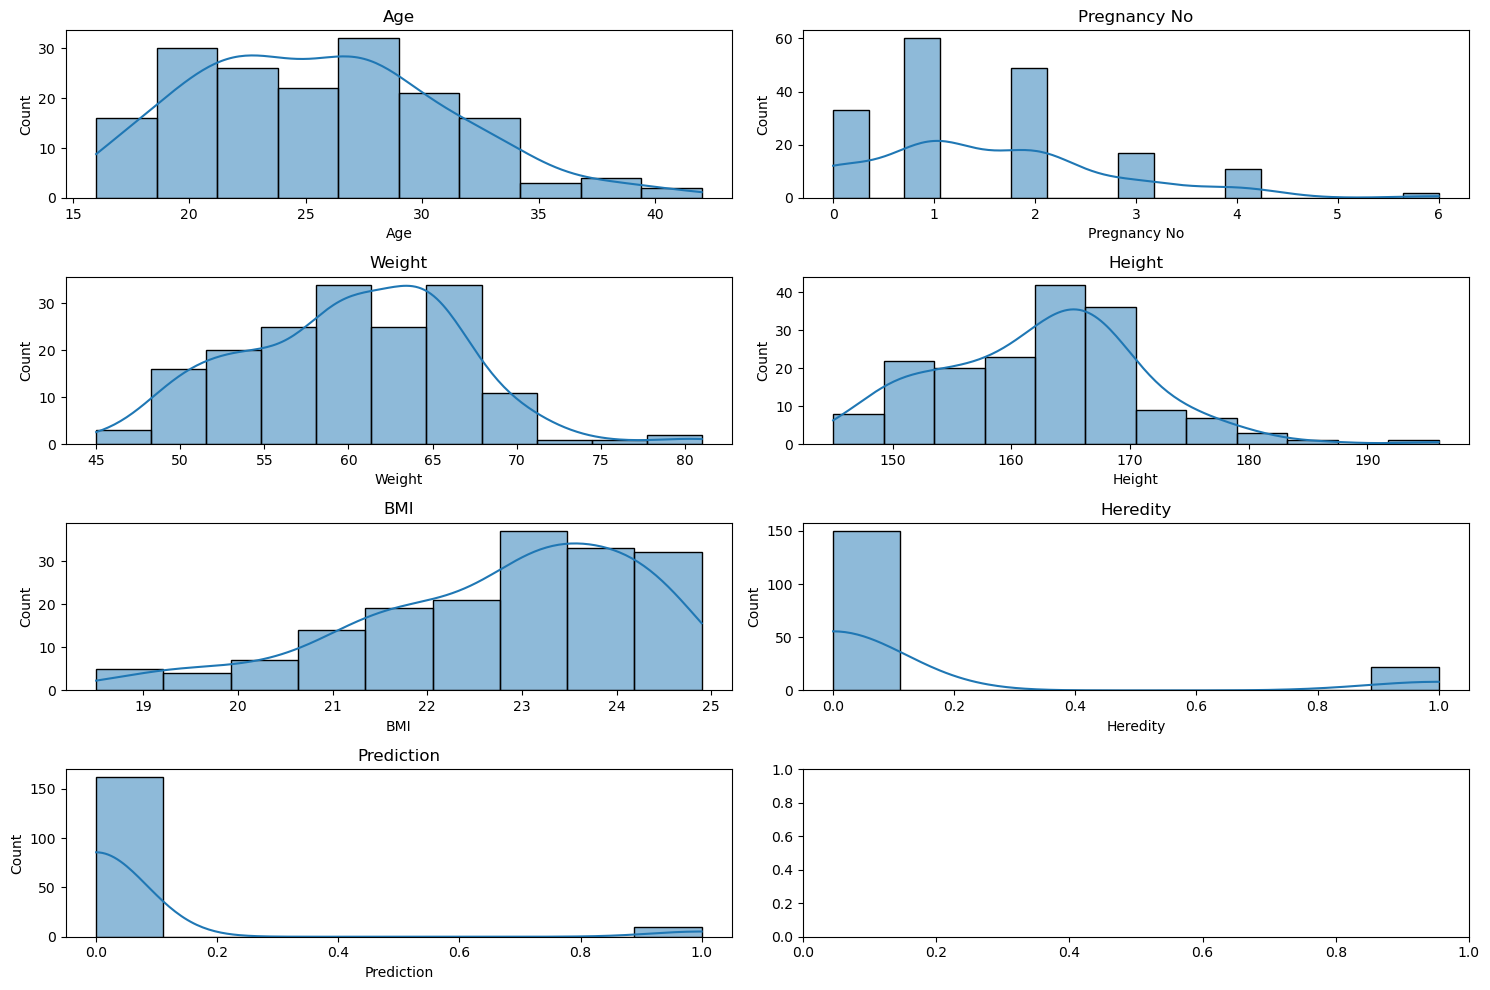

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Age', 'Pregnancy No', 'Weight', 'Height', 'BMI', 'Heredity', 'Prediction']
num_cols = 2
num_rows = 4
# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

axes = axes.flatten()
# Iterate over the columns and plot histograms
for i, col in enumerate(columns_to_plot):
    sns.histplot(df1[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

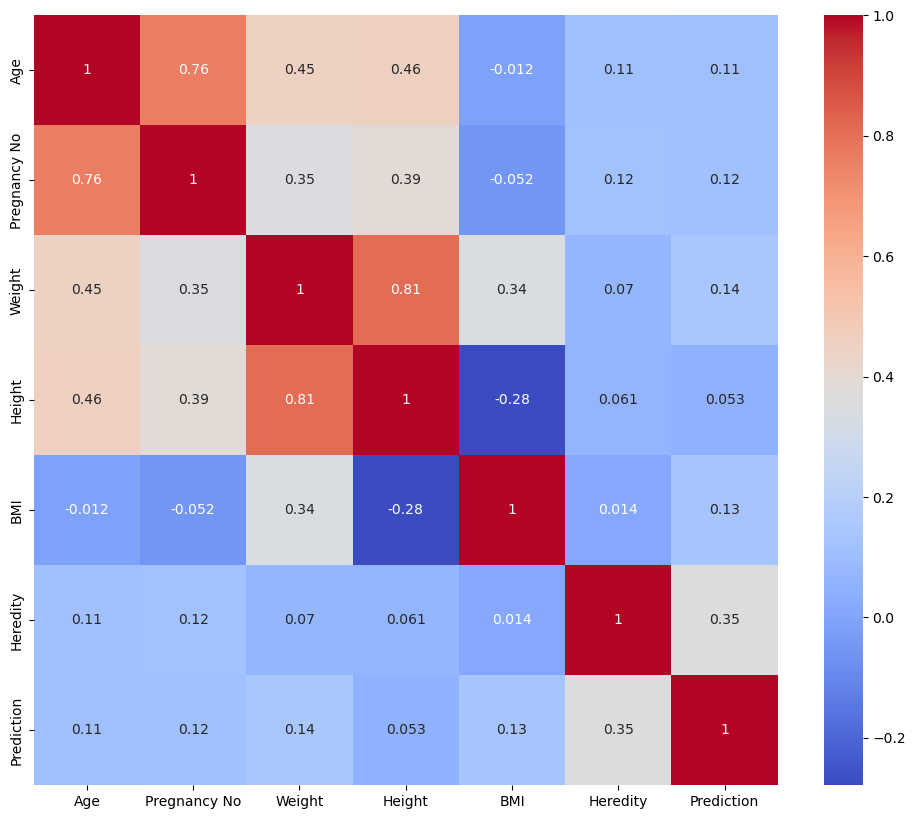

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


columns = ['Age', 'Pregnancy No', 'Weight','Height','BMI', 'Heredity', 'Prediction']

corr = df1[columns].corr()
plt.figure(figsize=(12, 10))  
sns.heatmap(corr, cmap="coolwarm", annot=True);

plt.show()

<Figure size 1000x800 with 0 Axes>

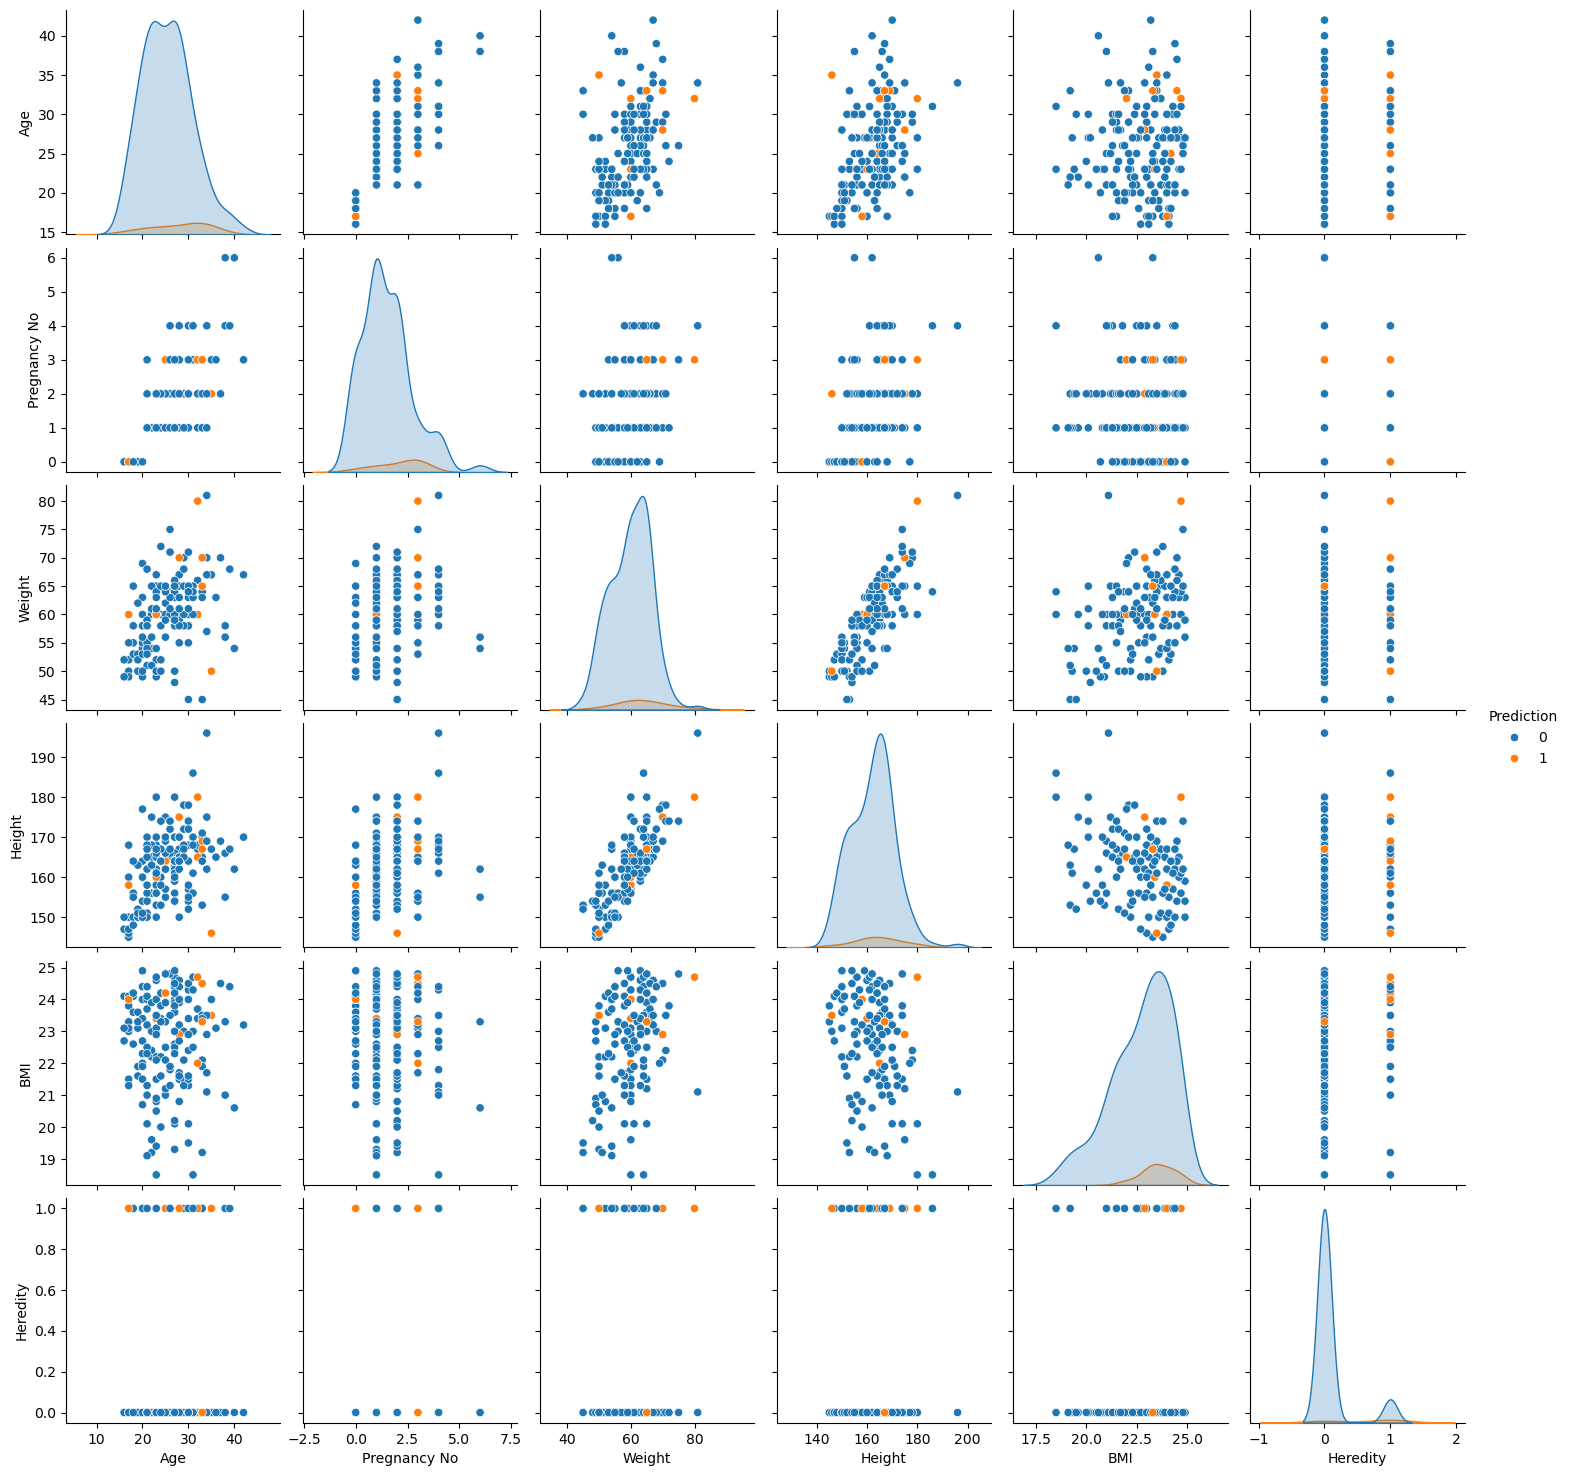

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.pairplot(df1, hue='Prediction')

plt.show()

In [12]:
df2.head()

Age  Pregnancy No  Weight  Height   BMI  Heredity  Prediction
0  17.0           1.0    48.0   165.0  17.6         0           0
1  17.0           1.0    49.0   145.0  23.3         0           0
2  17.0           1.0    50.0   140.0  25.5         0           0
3  17.0           1.0    50.0   145.0  23.8         0           0
4  17.0           1.0    49.0   146.0  23.0         0           0

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   float64
 1   Pregnancy No  1012 non-null   float64
 2   Weight        1012 non-null   float64
 3   Height        1012 non-null   float64
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.5 KB


In [14]:
df2.describe().T

count        mean        std    min     25%    50%    75%  \
Age           1012.0   30.357708   7.022960   16.0   24.00   30.0   36.0   
Pregnancy No  1012.0    2.517787   1.530656    1.0    1.00    2.0    3.0   
Weight        1012.0   72.988142  12.552712   43.0   64.75   70.0   80.0   
Height        1012.0  158.154150   7.367421  135.0  153.00  158.0  164.0   
BMI           1012.0   29.256818   5.092321   16.0   25.70   28.9   32.0   
Heredity      1012.0    0.226285   0.418632    0.0    0.00    0.0    0.0   
Prediction    1012.0    0.214427   0.410627    0.0    0.00    0.0    0.0   

                max  
Age            45.0  
Pregnancy No    9.0  
Weight        126.0  
Height        196.0  
BMI            54.3  
Heredity        1.0  
Prediction      1.0

In [15]:
df2.duplicated().sum()
print("====================")
df2 = df2.drop_duplicates()
print("====================")
df2.duplicated().sum()

0

In [16]:
df2.isnull().sum()

Age             0
Pregnancy No    0
Weight          0
Height          0
BMI             0
Heredity        0
Prediction      0
dtype: int64

In [17]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return  low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

columns = ['Age', 'Pregnancy No', 'Weight', 'Height', 'BMI', 'Heredity', 'Prediction']
for col in columns:
    print(col, check_outlier(df2, columns))

Age True
Pregnancy No True
Weight True
Height True
BMI True
Heredity True
Prediction True


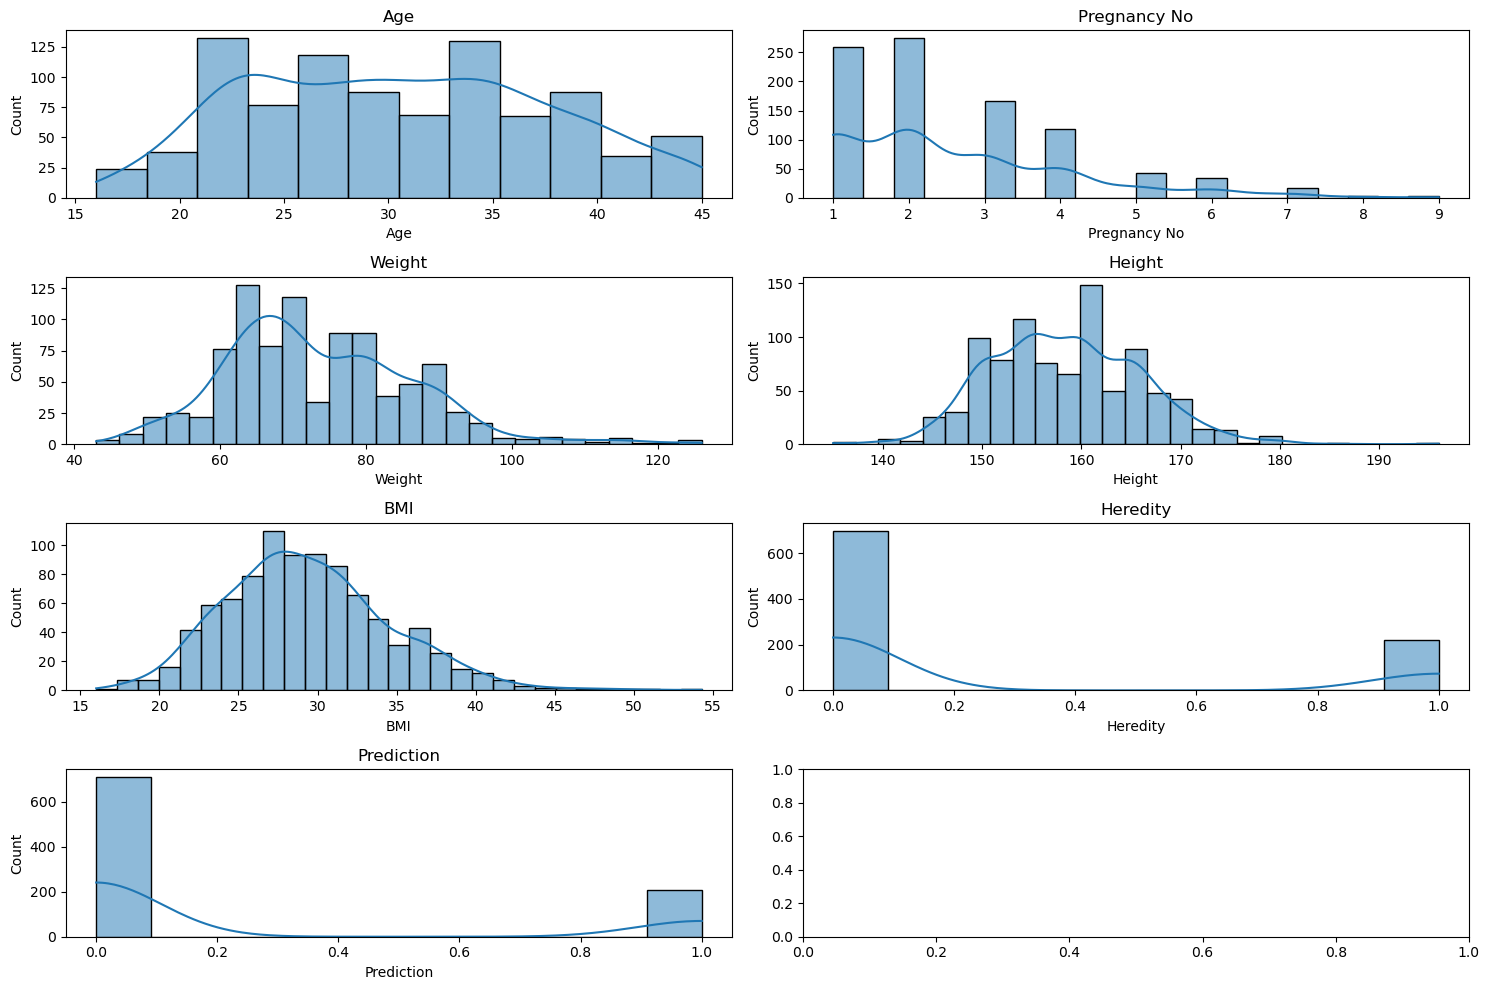

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Age', 'Pregnancy No', 'Weight', 'Height', 'BMI', 'Heredity', 'Prediction']
num_cols = 2
num_rows = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

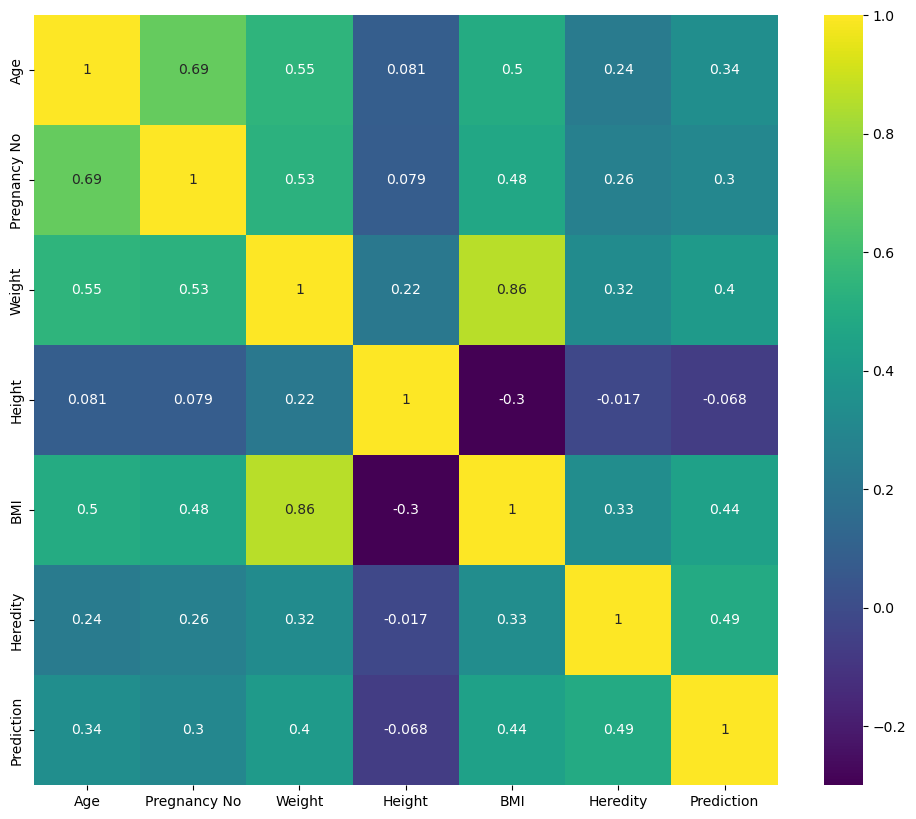

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


columns = ['Age', 'Pregnancy No', 'Weight','Height','BMI', 'Heredity', 'Prediction']
corr = df2[columns].corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(corr, cmap="viridis", annot=True);

plt.show()

<Figure size 1000x800 with 0 Axes>

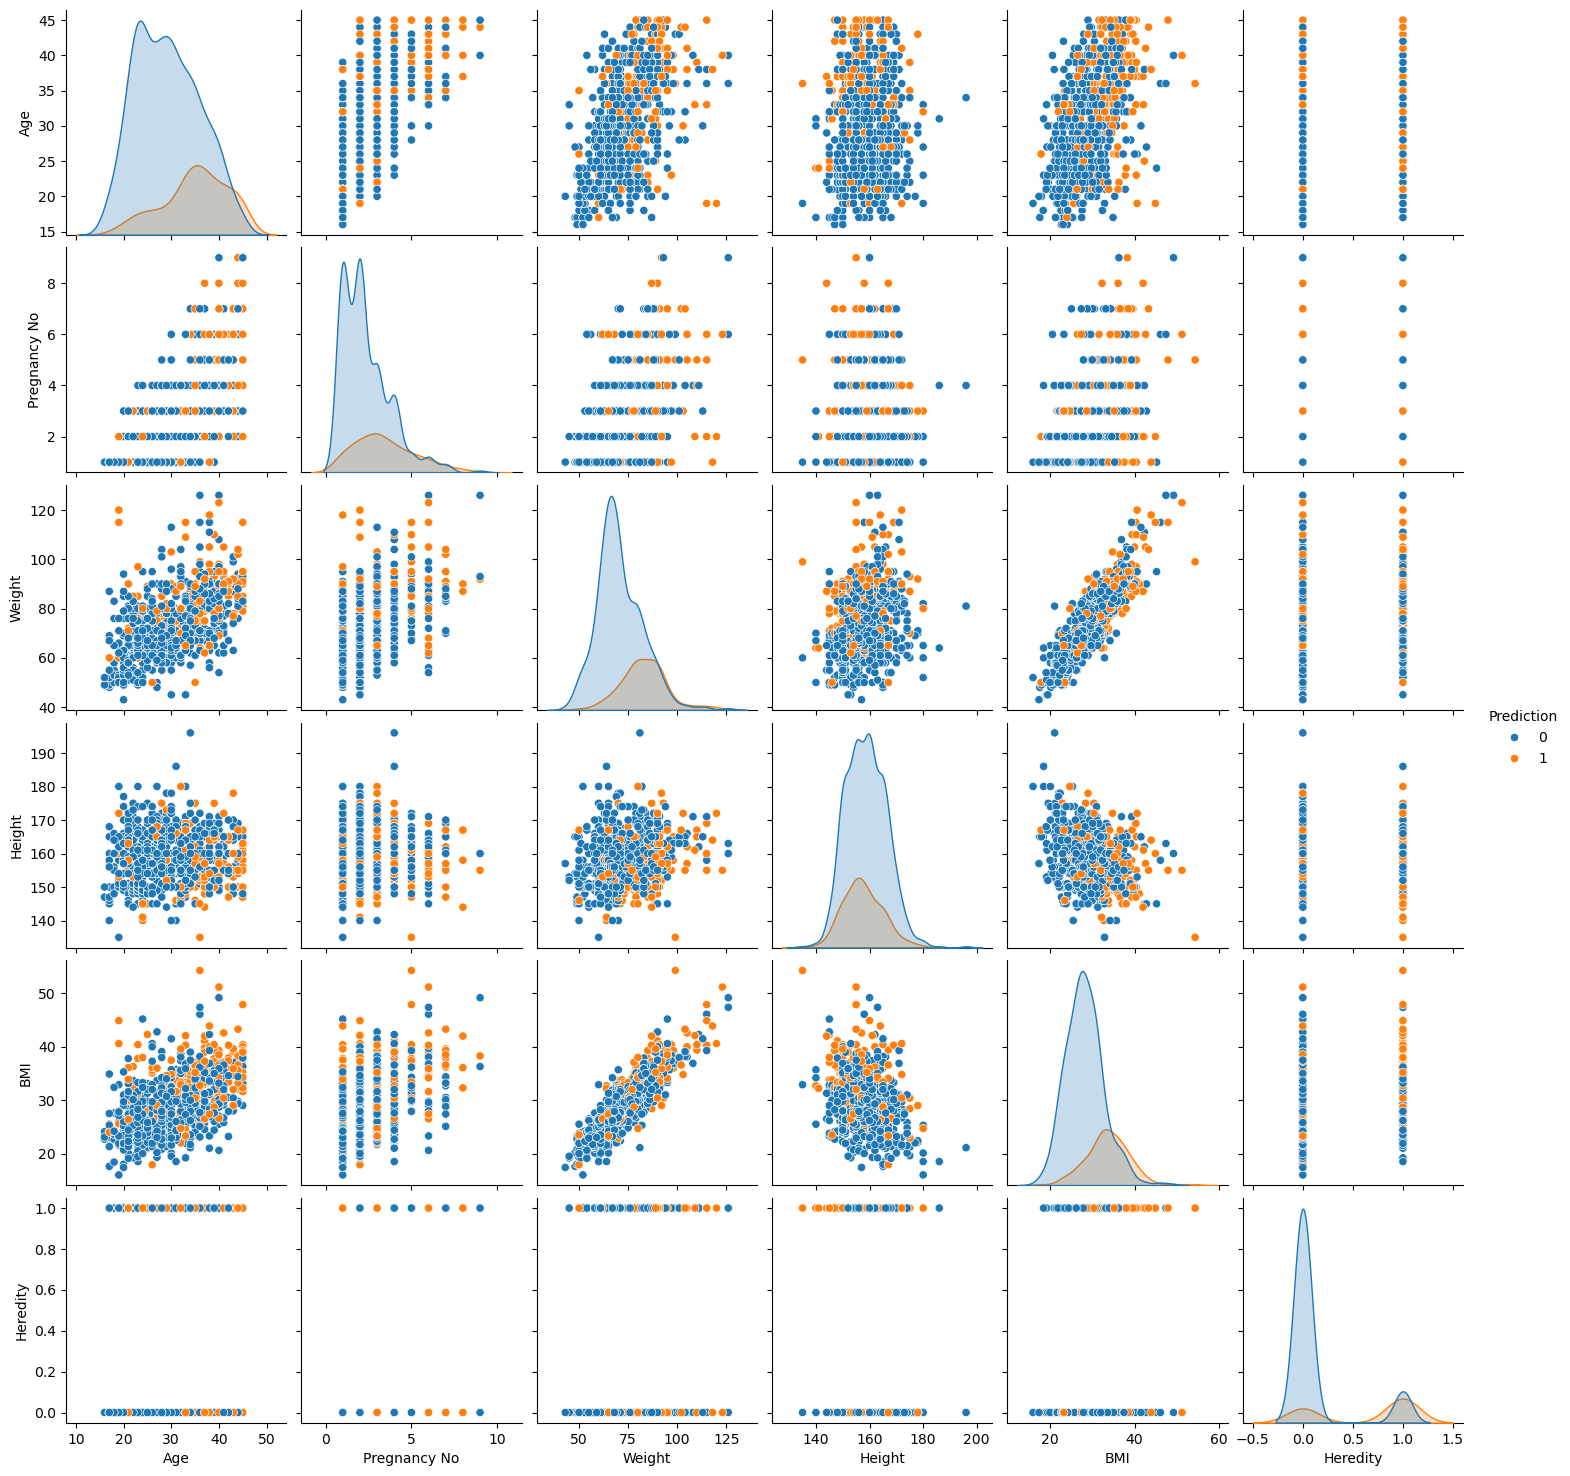

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.pairplot(df2, hue='Prediction')
plt.show()

In [21]:
df3.head()

Case Number  Age  No of Pregnancy  Gestation in previous Pregnancy  BMI  \
0            1   22                2                                1  NaN   
1            2   26                2                                1  NaN   
2            3   29                1                                0  NaN   
3            4   28                2                                1  NaN   
4            5   21                2                                1  NaN   

    HDL  Family History  unexplained prenetal loss  \
0  55.0               0                          0   
1  53.0               0                          0   
2  50.0               0                          0   
3  51.0               0                          0   
4  52.0               0                          0   

   Large Child or Birth Default  PCOS  Sys BP  Dia BP  OGTT  Hemoglobin  \
0                             0     0   102.0      69   NaN        12.0   
1                             0     0   101.0      63   NaN        12.4   
2                             0     0   118.0      79   NaN        14.3   
3                             0     0    99.0      70   NaN        15.0   
4                             0     0   116.0      65   NaN        15.0   

   Sedentary Lifestyle  Prediabetes  Class Label(GDM /Non GDM)  
0                    0            0                          0  
1                    0            0                          0  
2                    0            0                          0  
3                    0            0                          0  
4                    0            0                          0

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case Number                      3525 non-null   int64  
 1   Age                              3525 non-null   int64  
 2   No of Pregnancy                  3525 non-null   int64  
 3   Gestation in previous Pregnancy  3525 non-null   int64  
 4   BMI                              2444 non-null   float64
 5   HDL                              2524 non-null   float64
 6   Family History                   3525 non-null   int64  
 7   unexplained prenetal loss        3525 non-null   int64  
 8   Large Child or Birth Default     3525 non-null   int64  
 9   PCOS                             3525 non-null   int64  
 10  Sys BP                           1820 non-null   float64
 11  Dia BP                           3525 non-null   int64  
 12  OGTT                

In [23]:
df3.describe().T

count         mean          std   min  \
Case Number                      3525.0  1763.000000  1017.724177   1.0   
Age                              3525.0    32.581277     6.169107  20.0   
No of Pregnancy                  3525.0     2.076312     0.838637   1.0   
Gestation in previous Pregnancy  3525.0     0.960851     0.722313   0.0   
BMI                              2444.0    27.854092     5.714737  13.3   
HDL                              2524.0    46.471870    10.800813  15.0   
Family History                   3525.0     0.498156     0.500068   0.0   
unexplained prenetal loss        3525.0     0.364823     0.481449   0.0   
Large Child or Birth Default     3525.0     0.357730     0.479400   0.0   
PCOS                             3525.0     0.264681     0.441226   0.0   
Sys BP                           1820.0   135.762088    22.742844  90.0   
Dia BP                           3525.0    81.538156    11.379758  60.0   
OGTT                             3012.0   170.707503    48.160549  80.0   
Hemoglobin                       3525.0    13.959801     1.863969   8.8   
Sedentary Lifestyle              3525.0     0.449645     0.497529   0.0   
Prediabetes                      3525.0     0.293050     0.455226   0.0   
Class Label(GDM /Non GDM)        3525.0     0.389220     0.487643   0.0   

                                   25%     50%     75%     max  
Case Number                      882.0  1763.0  2644.0  3525.0  
Age                               28.0    32.0    37.0    45.0  
No of Pregnancy                    1.0     2.0     3.0     4.0  
Gestation in previous Pregnancy    0.0     1.0     1.0     2.0  
BMI                               24.4    27.5    31.0    45.0  
HDL                               42.0    49.0    55.0    70.0  
Family History                     0.0     0.0     1.0     1.0  
unexplained prenetal loss          0.0     0.0     1.0     1.0  
Large Child or Birth Default       0.0     0.0     1.0     1.0  
PCOS                               0.0     0.0     1.0     1.0  
Sys BP                           122.0   132.0   153.0   185.0  
Dia BP                            74.0    81.0    86.0   124.0  
OGTT                             142.0   156.0   195.0   403.0  
Hemoglobin                        12.7    14.0    15.0    18.0  
Sedentary Lifestyle                0.0     0.0     1.0     1.0  
Prediabetes                        0.0     0.0     1.0     1.0  
Class Label(GDM /Non GDM)          0.0     0.0     1.0     1.0

In [24]:
df3.duplicated().sum()

0

In [25]:
df3.isnull().sum()

Case Number                           0
Age                                   0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
BMI                                1081
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Sys BP                             1705
Dia BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
dtype: int64

In [26]:
df3 = df3.drop(columns=['Case Number'])

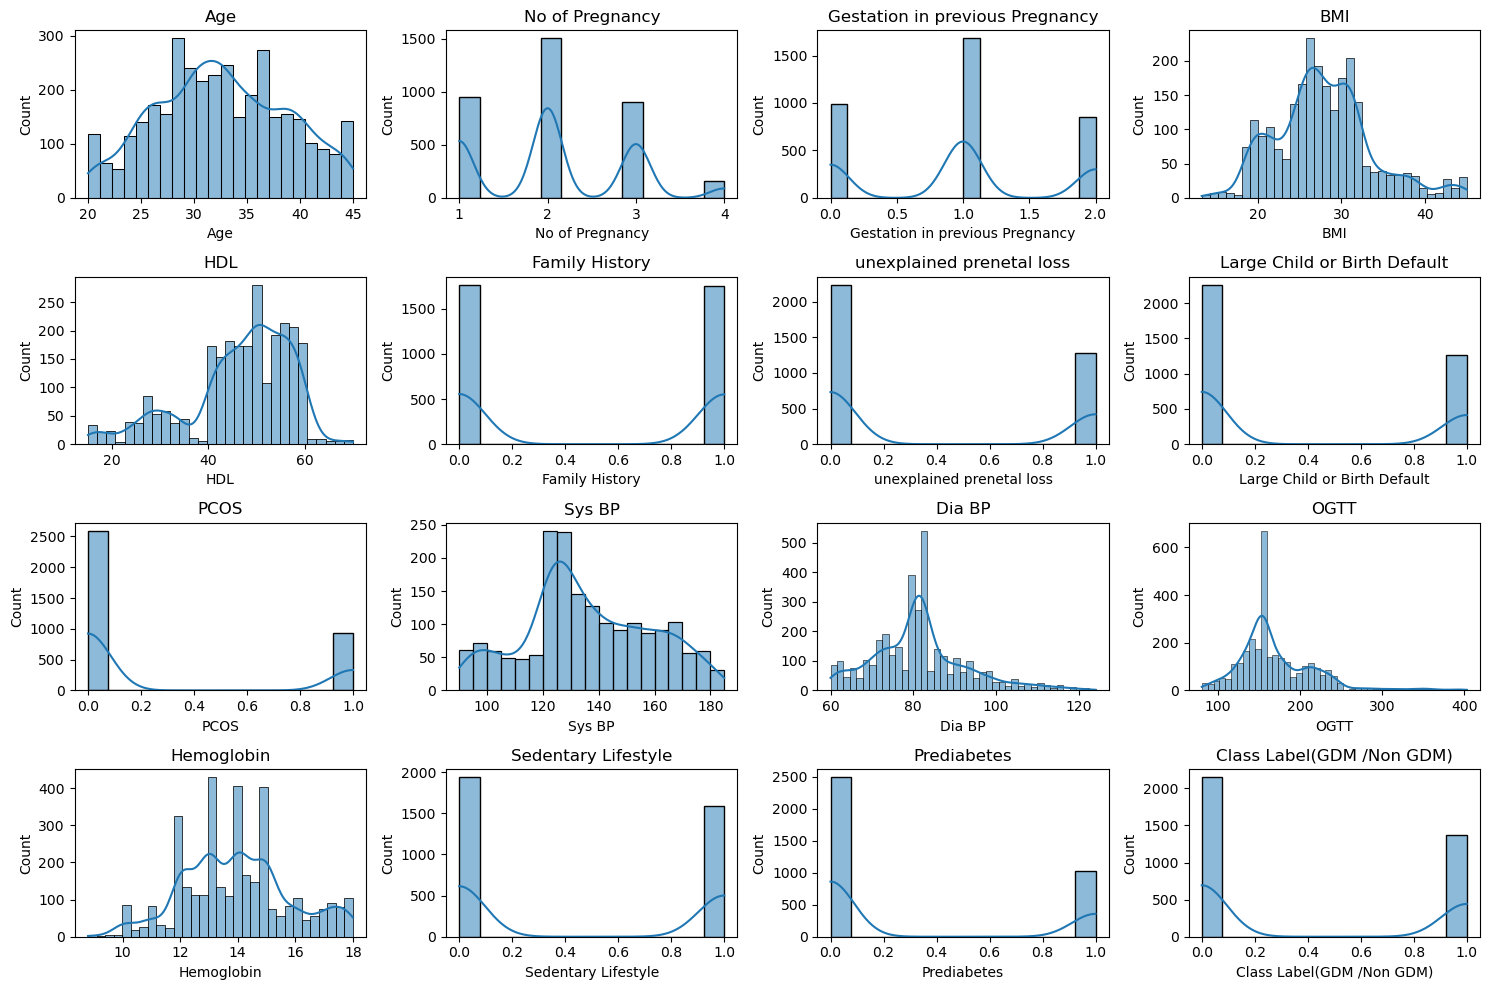

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Age', 'No of Pregnancy', 'Gestation in previous Pregnancy',
           'BMI', 'HDL', 'Family History', 'unexplained prenetal loss',
           'Large Child or Birth Default', 'PCOS', 'Sys BP', 'Dia BP',
           'OGTT', 'Hemoglobin', 'Sedentary Lifestyle', 'Prediabetes',
           'Class Label(GDM /Non GDM)']

num_cols = 4
num_rows = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

axes = axes.flatten()
for i, col in enumerate(columns):
    sns.histplot(df3[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

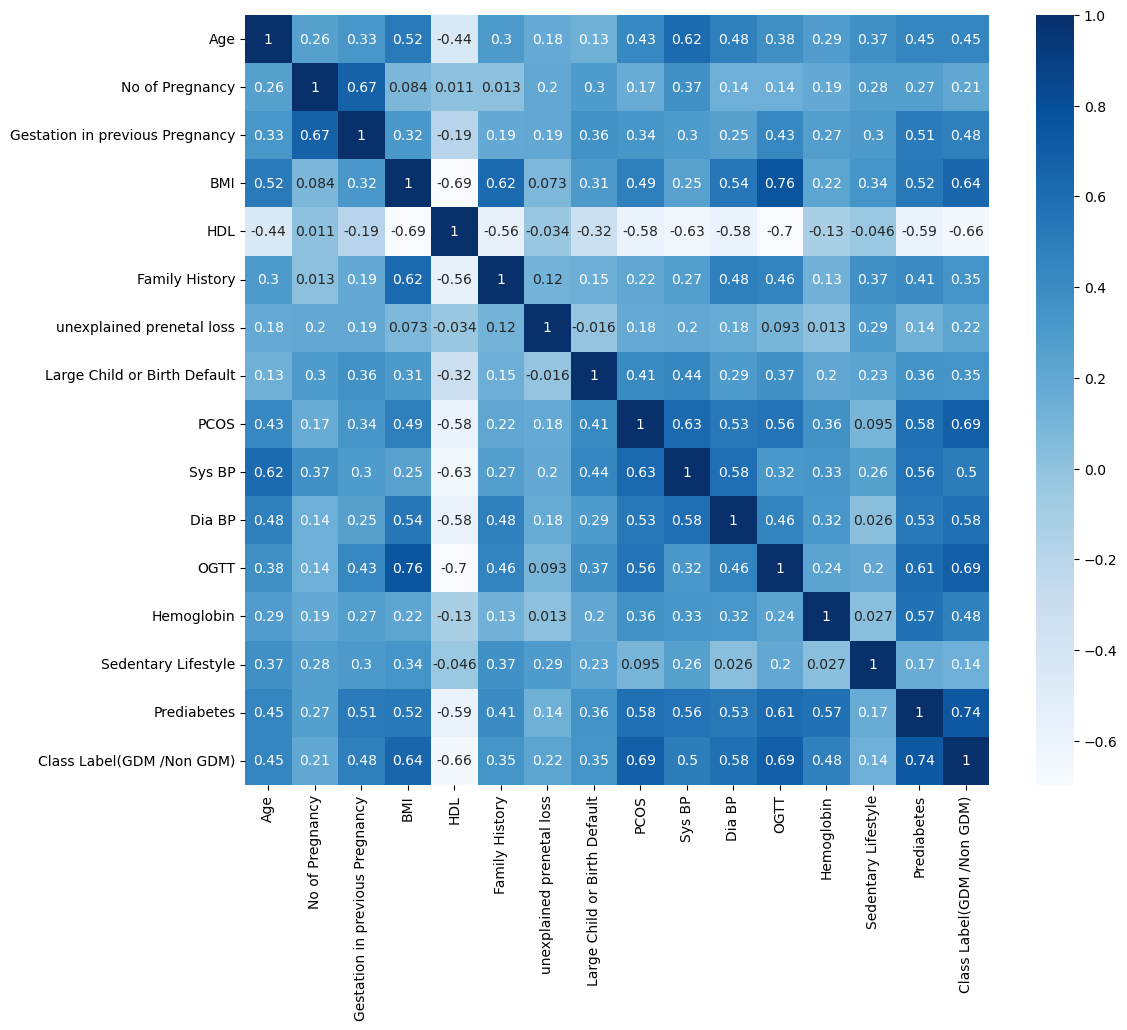

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Age', 'No of Pregnancy', 'Gestation in previous Pregnancy',
           'BMI', 'HDL', 'Family History', 'unexplained prenetal loss',
           'Large Child or Birth Default', 'PCOS', 'Sys BP', 'Dia BP',
           'OGTT', 'Hemoglobin', 'Sedentary Lifestyle', 'Prediabetes',
           'Class Label(GDM /Non GDM)']
corr = df3[columns].corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(corr, cmap="Blues", annot=True);

plt.show()

<Figure size 1200x1000 with 0 Axes>

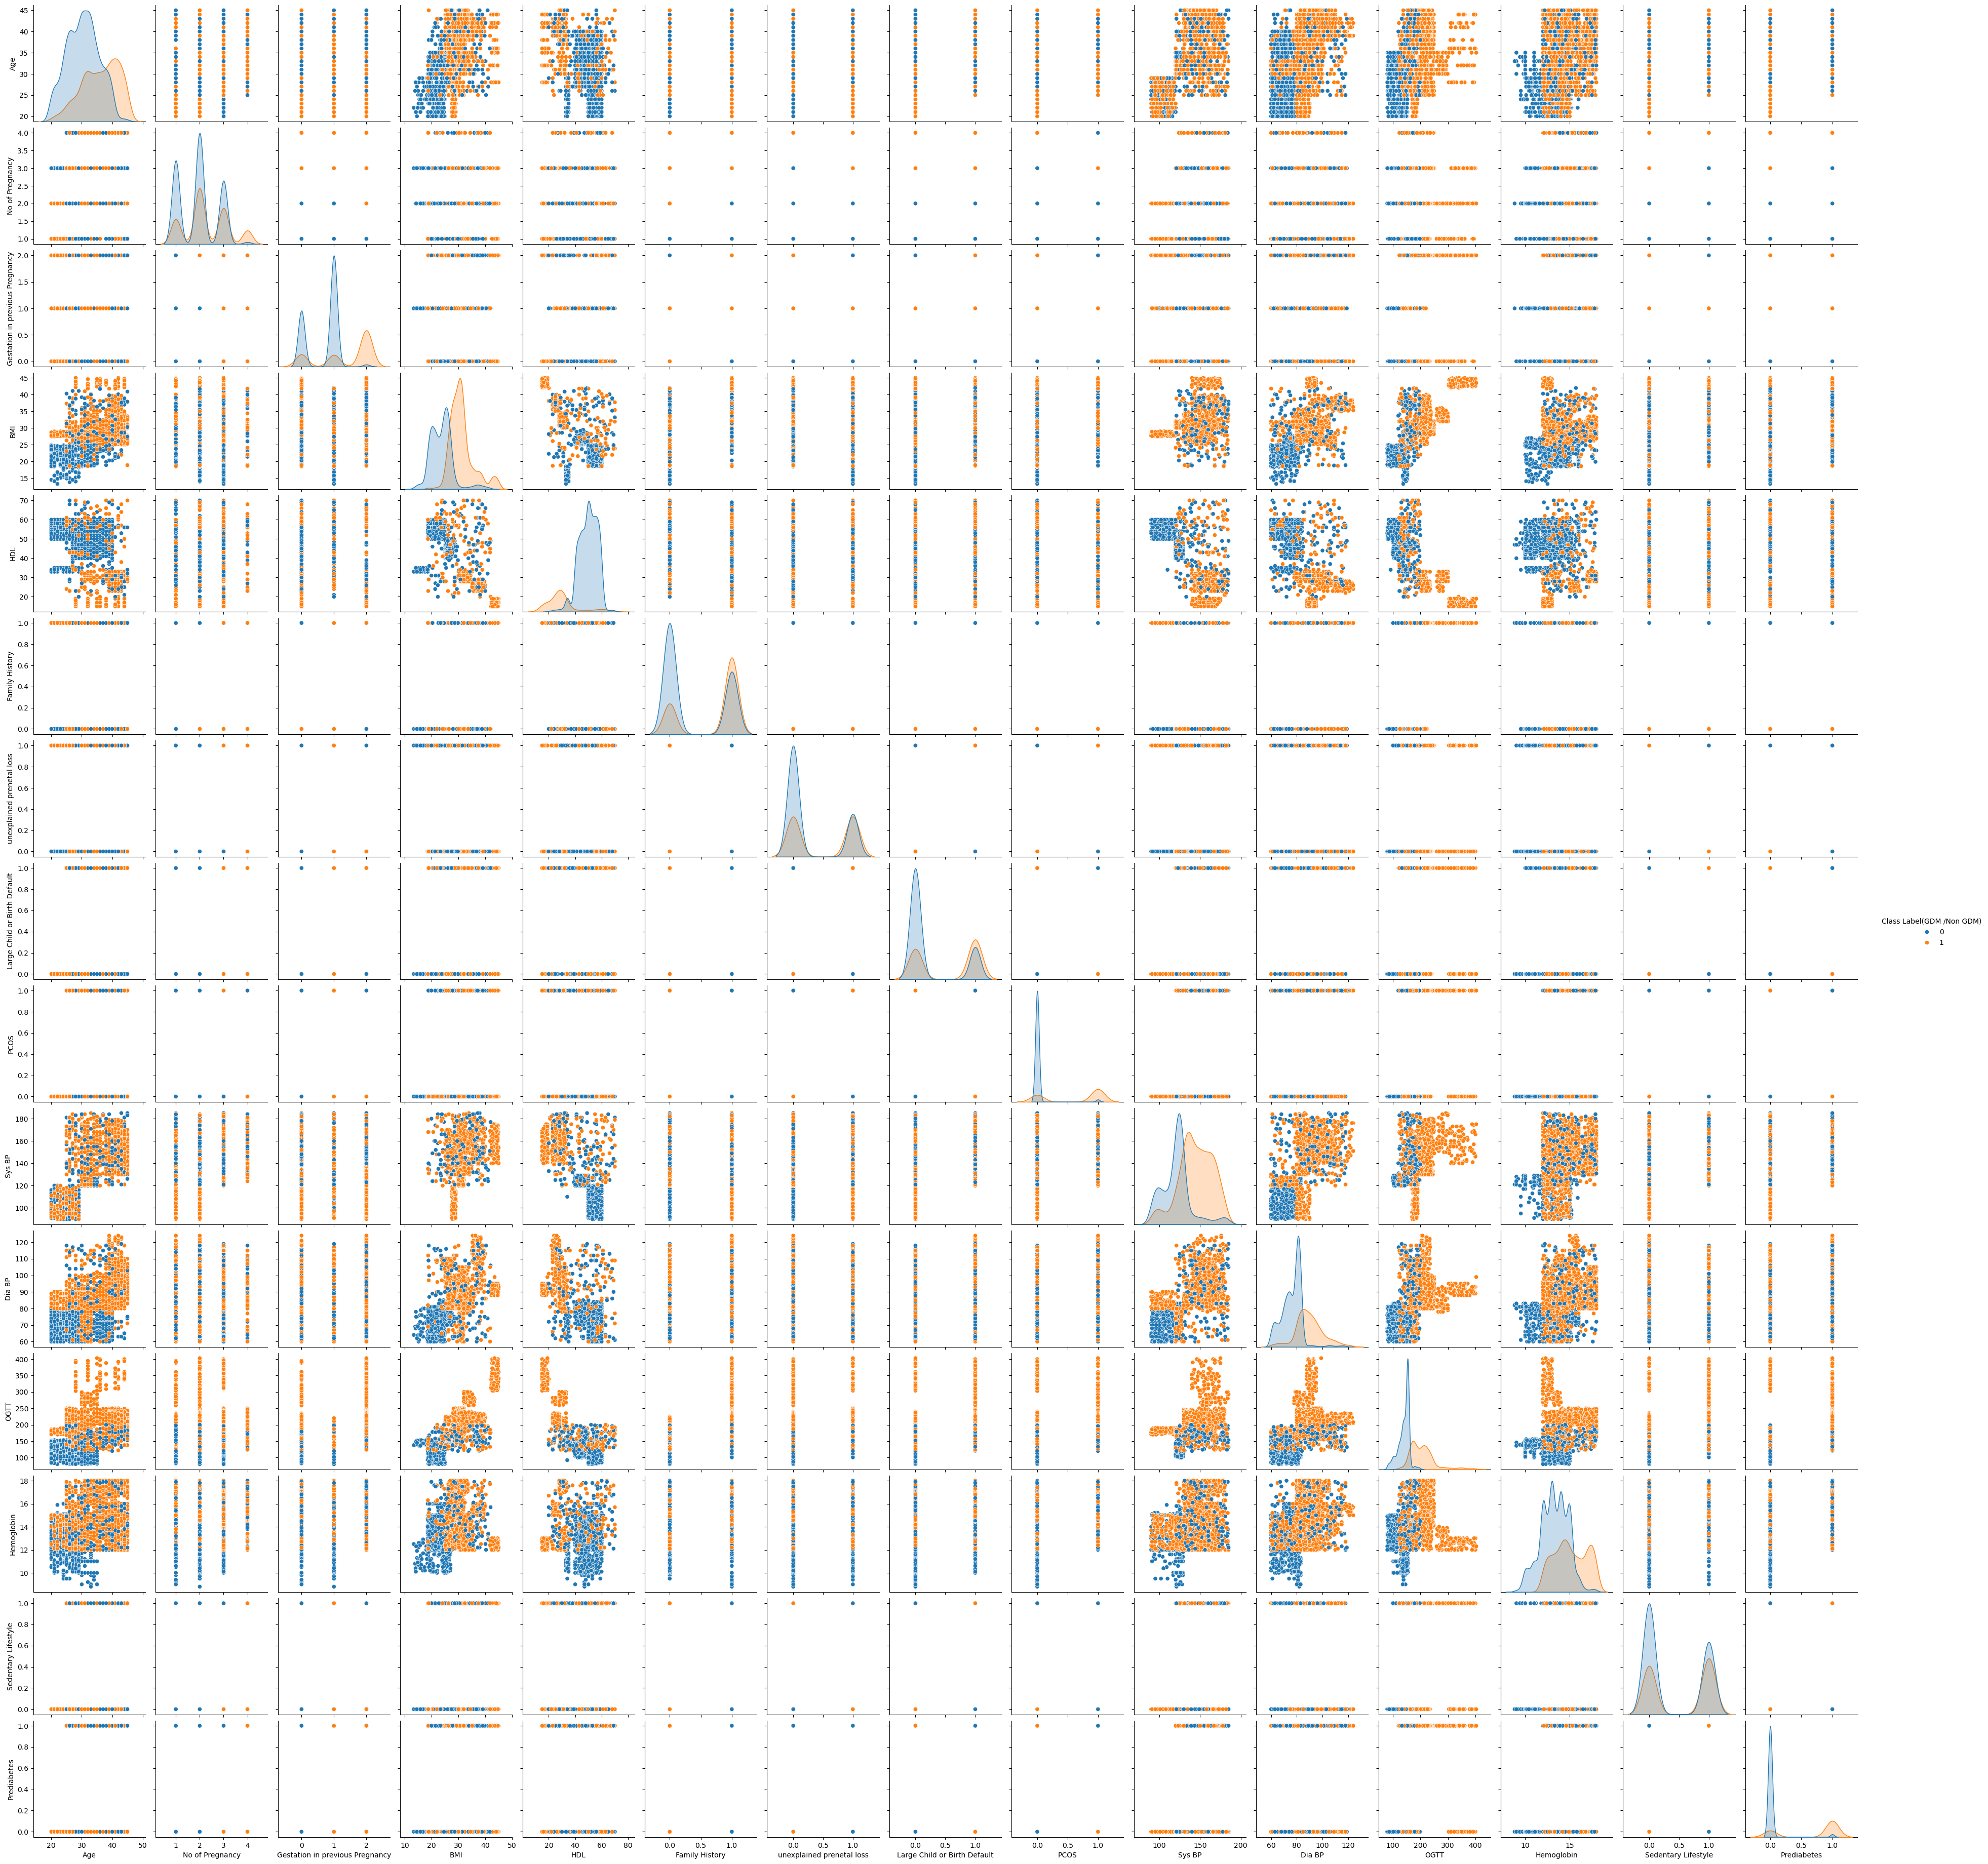

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  
sns.pairplot(df3, hue='Class Label(GDM /Non GDM)')  

plt.show()

In [30]:
#outlier detection
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return  low_limit, up_limit

In [31]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [32]:
columns_with_nulls = ['BMI', 'HDL', 'Sys BP', 'OGTT']

for col in columns_with_nulls:
    print(col, check_outlier(df3, columns_with_nulls))


BMI True
HDL True
Sys BP True
OGTT True


In [33]:
medians = df3[['BMI', 'HDL', 'OGTT']].median()
mean=  df3[['Sys BP']].mean()
# Fill null values with the respective median values
df3['BMI'].fillna(medians['BMI'] , inplace= True)
df3['HDL'].fillna(medians['HDL'], inplace= True)
df3['OGTT'].fillna(medians['OGTT'], inplace= True)
df3['Sys BP'].fillna(mean['Sys BP'], inplace= True)

In [34]:
df3.isnull().sum()

Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64

In [35]:
df3.describe().T

count        mean        std   min    25%  \
Age                              3525.0   32.581277   6.169107  20.0   28.0   
No of Pregnancy                  3525.0    2.076312   0.838637   1.0    1.0   
Gestation in previous Pregnancy  3525.0    0.960851   0.722313   0.0    0.0   
BMI                              3525.0   27.745504   4.760972  13.3   25.9   
HDL                              3525.0   47.189787   9.209814  15.0   45.0   
Family History                   3525.0    0.498156   0.500068   0.0    0.0   
unexplained prenetal loss        3525.0    0.364823   0.481449   0.0    0.0   
Large Child or Birth Default     3525.0    0.357730   0.479400   0.0    0.0   
PCOS                             3525.0    0.264681   0.441226   0.0    0.0   
Sys BP                           3525.0  135.762088  16.339666  90.0  132.0   
Dia BP                           3525.0   81.538156  11.379758  60.0   74.0   
OGTT                             3525.0  168.567092  44.818487  80.0  147.0   
Hemoglobin                       3525.0   13.959801   1.863969   8.8   12.7   
Sedentary Lifestyle              3525.0    0.449645   0.497529   0.0    0.0   
Prediabetes                      3525.0    0.293050   0.455226   0.0    0.0   
Class Label(GDM /Non GDM)        3525.0    0.389220   0.487643   0.0    0.0   

                                        50%         75%    max  
Age                               32.000000   37.000000   45.0  
No of Pregnancy                    2.000000    3.000000    4.0  
Gestation in previous Pregnancy    1.000000    1.000000    2.0  
BMI                               27.500000   29.600000   45.0  
HDL                               49.000000   52.000000   70.0  
Family History                     0.000000    1.000000    1.0  
unexplained prenetal loss          0.000000    1.000000    1.0  
Large Child or Birth Default       0.000000    1.000000    1.0  
PCOS                               0.000000    1.000000    1.0  
Sys BP                           135.762088  135.762088  185.0  
Dia BP                            81.000000   86.000000  124.0  
OGTT                             156.000000  184.000000  403.0  
Hemoglobin                        14.000000   15.000000   18.0  
Sedentary Lifestyle                0.000000    1.000000    1.0  
Prediabetes                        0.000000    1.000000    1.0  
Class Label(GDM /Non GDM)          0.000000    1.000000    1.0

In [36]:
df3['Class Label(GDM /Non GDM)'].value_counts()


Class Label(GDM /Non GDM)
0    2153
1    1372
Name: count, dtype: int64

In [37]:
df3.groupby('Class Label(GDM /Non GDM)').mean()

Age  No of Pregnancy  \
Class Label(GDM /Non GDM)                               
0                          30.382722         1.938226   
1                          36.031341         2.293003   

                           Gestation in previous Pregnancy        BMI  \
Class Label(GDM /Non GDM)                                               
0                                                 0.681839  25.603669   
1                                                 1.398688  31.106560   

                                 HDL  Family History  \
Class Label(GDM /Non GDM)                              
0                          49.647469        0.360427   
1                          43.333090        0.714286   

                           unexplained prenetal loss  \
Class Label(GDM /Non GDM)                              
0                                           0.278681   
1                                           0.500000   

                           Large Child or Birth Default      PCOS      Sys BP  \
Class Label(GDM /Non GDM)                                                       
0                                              0.224803  0.020437  131.088970   
1                                              0.566327  0.647959  143.095341   

                              Dia BP        OGTT  Hemoglobin  \
Class Label(GDM /Non GDM)                                      
0                          76.272643  144.059452   13.244868   
1                          89.801020  207.025510   15.081706   

                           Sedentary Lifestyle  Prediabetes  
Class Label(GDM /Non GDM)                                    
0                                     0.394798     0.024152  
1                                     0.535714     0.715015

In [38]:
x = df3.drop(['Class Label(GDM /Non GDM)'],axis=1)
x.head()

Age  No of Pregnancy  Gestation in previous Pregnancy   BMI   HDL  \
0   22                2                                1  27.5  55.0   
1   26                2                                1  27.5  53.0   
2   29                1                                0  27.5  50.0   
3   28                2                                1  27.5  51.0   
4   21                2                                1  27.5  52.0   

   Family History  unexplained prenetal loss  Large Child or Birth Default  \
0               0                          0                             0   
1               0                          0                             0   
2               0                          0                             0   
3               0                          0                             0   
4               0                          0                             0   

   PCOS  Sys BP  Dia BP   OGTT  Hemoglobin  Sedentary Lifestyle  Prediabetes  
0     0   102.0      69  156.0        12.0                    0            0  
1     0   101.0      63  156.0        12.4                    0            0  
2     0   118.0      79  156.0        14.3                    0            0  
3     0    99.0      70  156.0        15.0                    0            0  
4     0   116.0      65  156.0        15.0                    0            0

In [39]:
y = df3['Class Label(GDM /Non GDM)']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class Label(GDM /Non GDM), dtype: int64

In [40]:
#!pip install shap

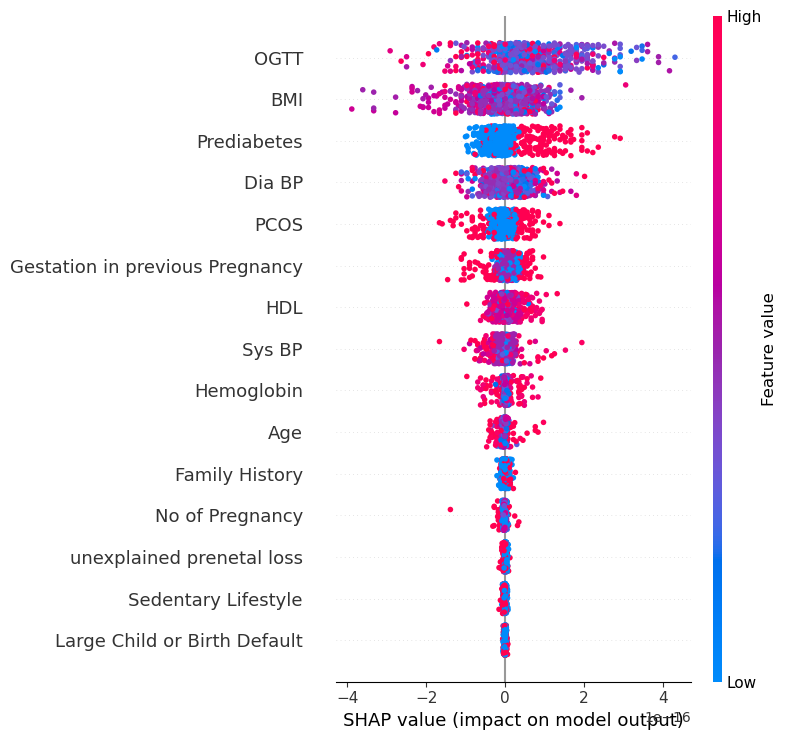

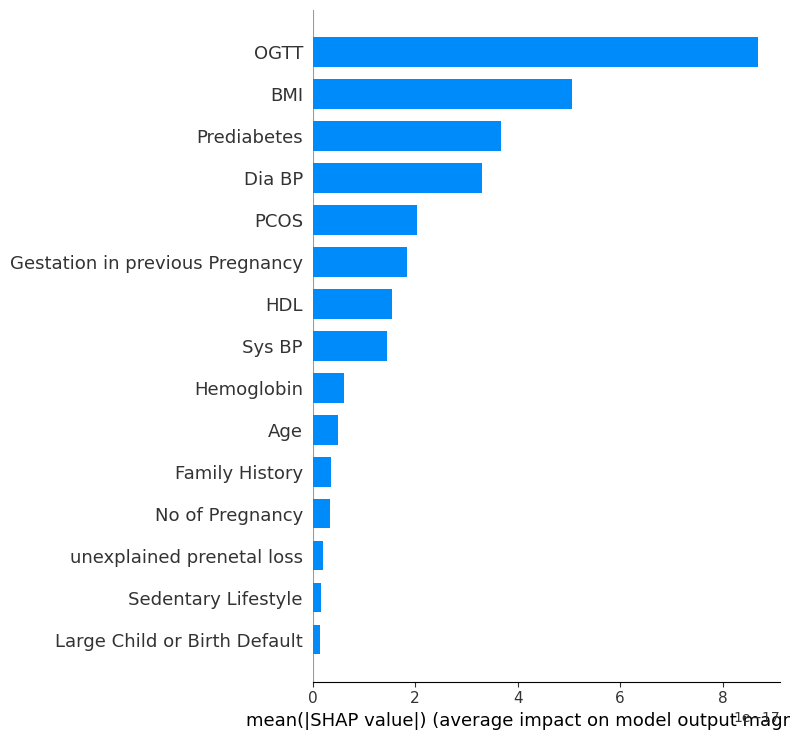

In [41]:
import shap
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap_values_avg = shap_values.mean(axis=2)
shap.summary_plot(shap_values_avg, X_test)
shap.summary_plot(shap_values_avg, X_test, plot_type='bar')


In [42]:
x=x.drop(columns=['Age', 'Family History', 'No of Pregnancy', 'unexplained prenetal loss', 'Sedentary Lifestyle', 'Large Child or Birth Default'], axis=1)

In [43]:
x.head()

Gestation in previous Pregnancy   BMI   HDL  PCOS  Sys BP  Dia BP   OGTT  \
0                                1  27.5  55.0     0   102.0      69  156.0   
1                                1  27.5  53.0     0   101.0      63  156.0   
2                                0  27.5  50.0     0   118.0      79  156.0   
3                                1  27.5  51.0     0    99.0      70  156.0   
4                                1  27.5  52.0     0   116.0      65  156.0   

   Hemoglobin  Prediabetes  
0        12.0            0  
1        12.4            0  
2        14.3            0  
3        15.0            0  
4        15.0            0

#feature extraction
#kaggle
def feature_extraction(x):

    x['BMI_label'] = pd.cut(x=x['BMI'],
                                  bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9,  np.inf],
                                  labels=["Underweight", "Healthy", "Overweight",
                                          "Obese_Class1", "Obese_Class2", "Obese_Class3"])
    x['HDL_label'] = pd.cut(x=x['HDL'],
                      bins=[0, 50, 60, np.inf],
                      labels=["Low", "Good", "High"])

    x['Sys_BP_label'] = pd.cut(x=x['Sys BP'],
                          bins=[0, 90, 120, 180, np.inf],
                          labels=["Low_Blood_Pressure", "Normal",
                                  "Hypertension_Stage_1", "Hypertension_Stage_2"])


    x['Dia_BP_label'] = pd.cut(x=x['Dia BP'],
                          bins=[0, 60, 80, 90, 100, 120, np.inf],
                          labels=["Low_Blood_Pressure", "Normal",
                                  "Elevated", "Hypertension_Stage_1",
                                  "Hypertension_Stage_2", "Hypertensive_Crisis"])

    x['OGTT_label'] = pd.cut(x=x['OGTT'],
                                  bins=[0, 140, 199, np.inf],
                                  labels=["Normal", "Impaired_Glucose_Tolerance","Diabetes"])

    #dataframe.loc[(x['OGTT'] > 200)
    x.loc[(x['OGTT'] <= 140), "GDM category"] = "Normal"

    x.loc[(x['OGTT'] >= 140) & (x['OGTT'] <= 199), "GDM category"] = "At Risk"

    x.loc[(x['OGTT'] >= 200) , "GDM category"] = "GDM positive"
#feature_extraction(x)
    



In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

X = pd.DataFrame(x_scaled, columns=x.columns)
X

Gestation in previous Pregnancy       BMI       HDL      PCOS    Sys BP  \
0                            0.054207 -0.051573  0.848152 -0.599961 -2.066559   
1                            0.054207 -0.051573  0.630961 -0.599961 -2.127768   
2                           -1.330431 -0.051573  0.305176 -0.599961 -1.087208   
3                            0.054207 -0.051573  0.413771 -0.599961 -2.250187   
4                            0.054207 -0.051573  0.522366 -0.599961 -1.209626   
...                               ...       ...       ...       ...       ...   
3520                         0.054207 -0.765814 -1.649539 -0.599961  0.871495   
3521                         0.054207  1.418923 -0.454991  1.666774  1.850846   
3522                         1.438845 -0.870850  0.956747 -0.599961  2.585359   
3523                        -1.330431 -0.933871 -2.083919  1.666774  0.198191   
3524                        -1.330431  0.179505 -1.866729 -0.599961 -0.903579   

        Dia BP      OGTT  Hemoglobin  Prediabetes  
0    -1.101951 -0.280440   -1.051562    -0.643837  
1    -1.629278 -0.280440   -0.836936    -0.643837  
2    -0.223073 -0.280440    0.182539    -0.643837  
3    -1.014063 -0.280440    0.558135    -0.643837  
4    -1.453502 -0.280440    0.558135    -0.643837  
...        ...       ...         ...          ...  
3520  2.237785  0.411337   -0.300370     1.553187  
3521  0.304254 -0.101916    0.128882    -0.643837  
3522 -0.047297 -0.615170    0.719105     1.553187  
3523  2.940888 -0.793693   -0.354027     1.553187  
3524 -1.629278  0.232814    0.987388    -0.643837  

[3525 rows x 9 columns]

In [45]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [46]:
X.shape, X_train.shape, X_test.shape

((3525, 9), (2820, 9), (705, 9))

SVM classifier

In [60]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernel functions
    'gamma': ['scale', 'auto'],         # Kernel coefficient
    'degree': [2, 3, 4],                # Degree of polynomial kernel (used if kernel='poly')
}

# Step 2: Initialize the SVC classifier
classifier = svm.SVC(random_state=42)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Optimize for accuracy
    verbose=2,          # Show progress
    n_jobs=-1           # Use all available processors
)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and best model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_classifier = grid_search.best_estimator_

# Step 6: Train the best model on the full training data
best_classifier.fit(X_train, y_train)

# Step 7: Evaluate the model
# Accuracy on training data
X_train_prediction = best_classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = best_classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy score of the training data :  0.999645390070922
Accuracy score of the test data :  0.9716312056737588


Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],                # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],    # Optimization algorithm
    'max_iter': [100, 200, 500]                  # Number of iterations
}

# Step 2: Initialize the Logistic Regression classifier
classifier = LogisticRegression(random_state=42)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Optimize for accuracy
    verbose=2,          # Show progress
    n_jobs=-1           # Use all available processors
)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and best model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_classifier = grid_search.best_estimator_

# Step 6: Train the best model on the full training data
best_classifier.fit(X_train, y_train)

# Step 7: Evaluate the model
# Accuracy on training data
X_train_prediction = best_classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = best_classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy on Test data : ', test_data_accuracy)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Training data :  0.9680851063829787
Accuracy on Test data :  0.9588652482269504


Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],            # Tree depth
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10],       # Minimum samples required at a leaf node
    'max_leaf_nodes': [None, 10, 20, 50],    # Maximum number of leaf nodes
    'ccp_alpha': [0.0, 0.01, 0.1]            # Complexity parameter for pruning
}

# Step 2: Initialize the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_classifier,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Optimize for accuracy
    verbose=2,          # Show progress
    n_jobs=-1           # Use all available processors
)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and best model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_tree_classifier = grid_search.best_estimator_

# Step 6: Train the best model on the full training data
best_tree_classifier.fit(X_train, y_train)

# Step 7: Evaluate the model
# Accuracy on training data
X_train_prediction = best_tree_classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = best_tree_classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy on Test data : ', test_data_accuracy)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy on Training data :  0.9875886524822695
Accuracy on Test data :  0.9617021276595744


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],   # Number of neighbors to test
    'weights': ['uniform', 'distance'], # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metrics
}

# Step 2: Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Optimize for accuracy
    verbose=2,          # Show progress
    n_jobs=-1           # Use all available processors
)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and best model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_knn_classifier = grid_search.best_estimator_

# Step 6: Train the best model on the full training data
best_knn_classifier.fit(X_train, y_train)

# Step 7: Evaluate the model
# Accuracy on training data
X_train_prediction = best_knn_classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = best_knn_classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy on Test data : ', test_data_accuracy)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy on Training data :  0.9858156028368794
Accuracy on Test data :  0.9744680851063829


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_classifier, 
    param_grid=param_grid, 
    cv=5,              # 5-fold cross-validation
    scoring='accuracy', # Optimize for accuracy
    verbose=2,         # Show progress
    n_jobs=-1          # Use all available processors
)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and best model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = grid_search.best_estimator_

# Step 6: Train the best model on the full training data
best_rf_classifier.fit(X_train, y_train)

# Step 7: Evaluate the model
# Accuracy on training data
X_train_prediction = best_rf_classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = best_rf_classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy on Test data : ', test_data_accuracy)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Accuracy on Training data :  0.9960992907801418
Accuracy on Test data :  0.9687943262411347
